In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.stats import randint, uniform

# EDA (Exploratory Data Analysis)

## Load Dataset

In [2]:
df = pd.read_csv("/content/default of credit card clients.csv", sep=";", header=1)

# Deteksi kolom target otomatis
label_col = [c for c in df.columns if "default" in c.lower()][0]

## 5 Baris Pertama

In [3]:
print("=== 5 baris pertama ===")
print(df.head(), "\n")

=== 5 baris pertama ===
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  


## Informasi Umum Dataset & Tipe Data

In [4]:
print("=== Info dataset ===")
print(df.info(), "\n")

=== Info dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-nu

## Statistik Deskriptif Kolom Numerik

In [5]:
print("=== Statistik deskriptif ===")
print(df.describe(), "\n")

=== Statistik deskriptif ===
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std 

## Nama Kolom & Jumlah Nilai Unik

In [6]:
print("=== Nama kolom ===")
print(df.columns.tolist(), "\n")

=== Nama kolom ===
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'] 



## Jumlah Nilai Unik per Kolom

In [7]:
print("=== Jumlah nilai unik tiap kolom ===")
print(df.nunique(), "\n")

=== Jumlah nilai unik tiap kolom ===
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64 



## Cek Missing Value

In [8]:
print("=== Missing values ===")
print(df.isnull().sum(), "\n")

=== Missing values ===
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64 



## Visualisasi Target

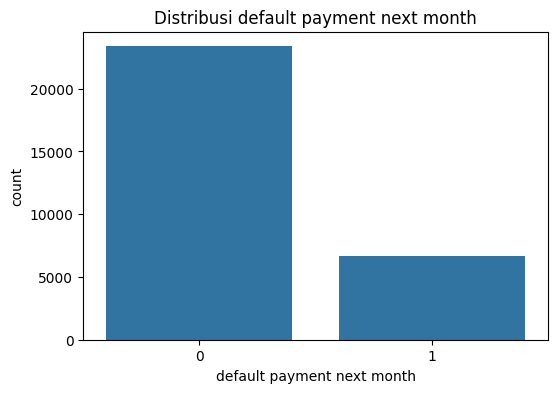

In [9]:
label_col = [c for c in df.columns if "default" in c.lower()][0]

plt.figure(figsize=(6,4))
sns.countplot(x=label_col, data=df)
plt.title(f'Distribusi {label_col}')
plt.show()

## Histogram Kolom Numerik

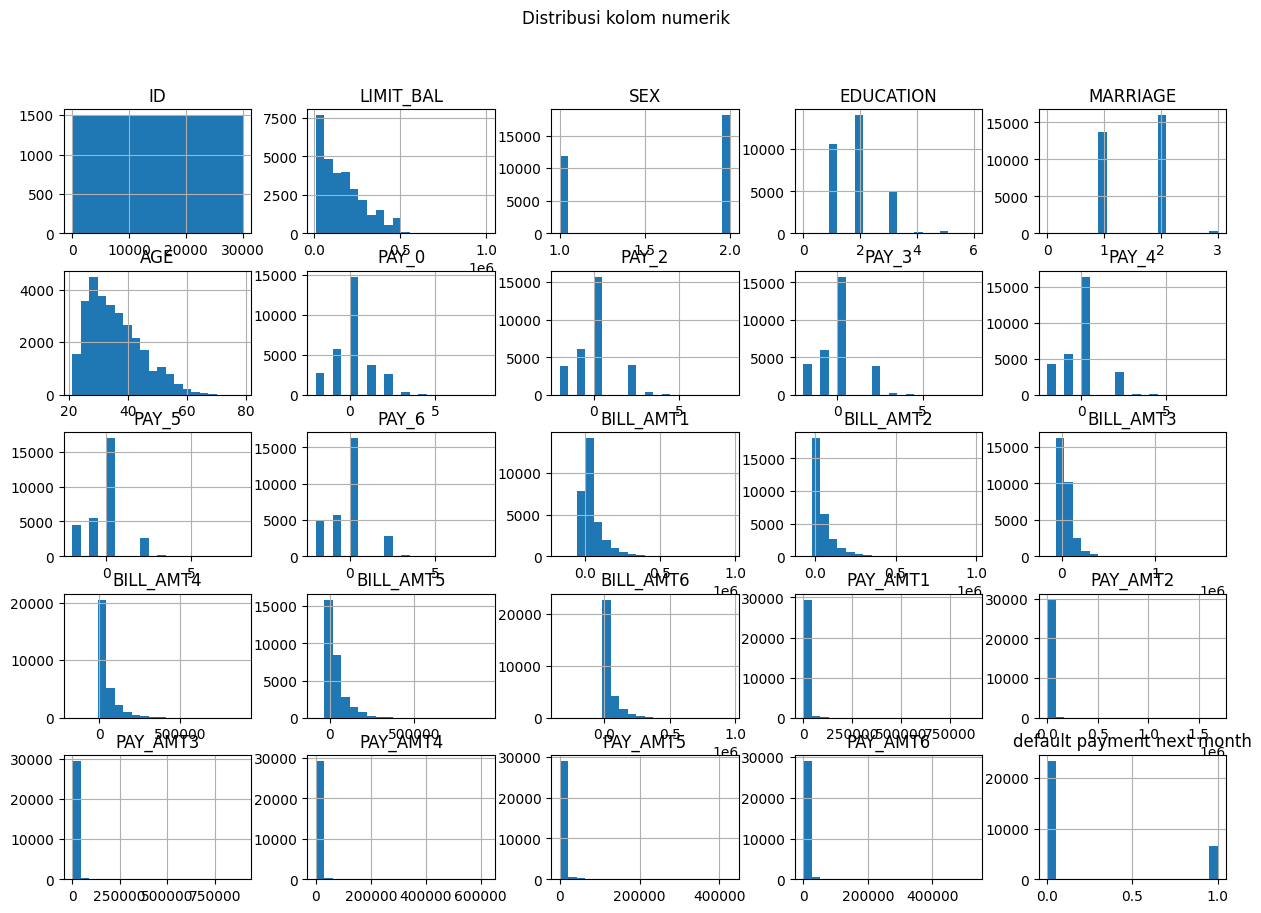

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Distribusi kolom numerik")
plt.show()

## Korelasi Antar Fitur

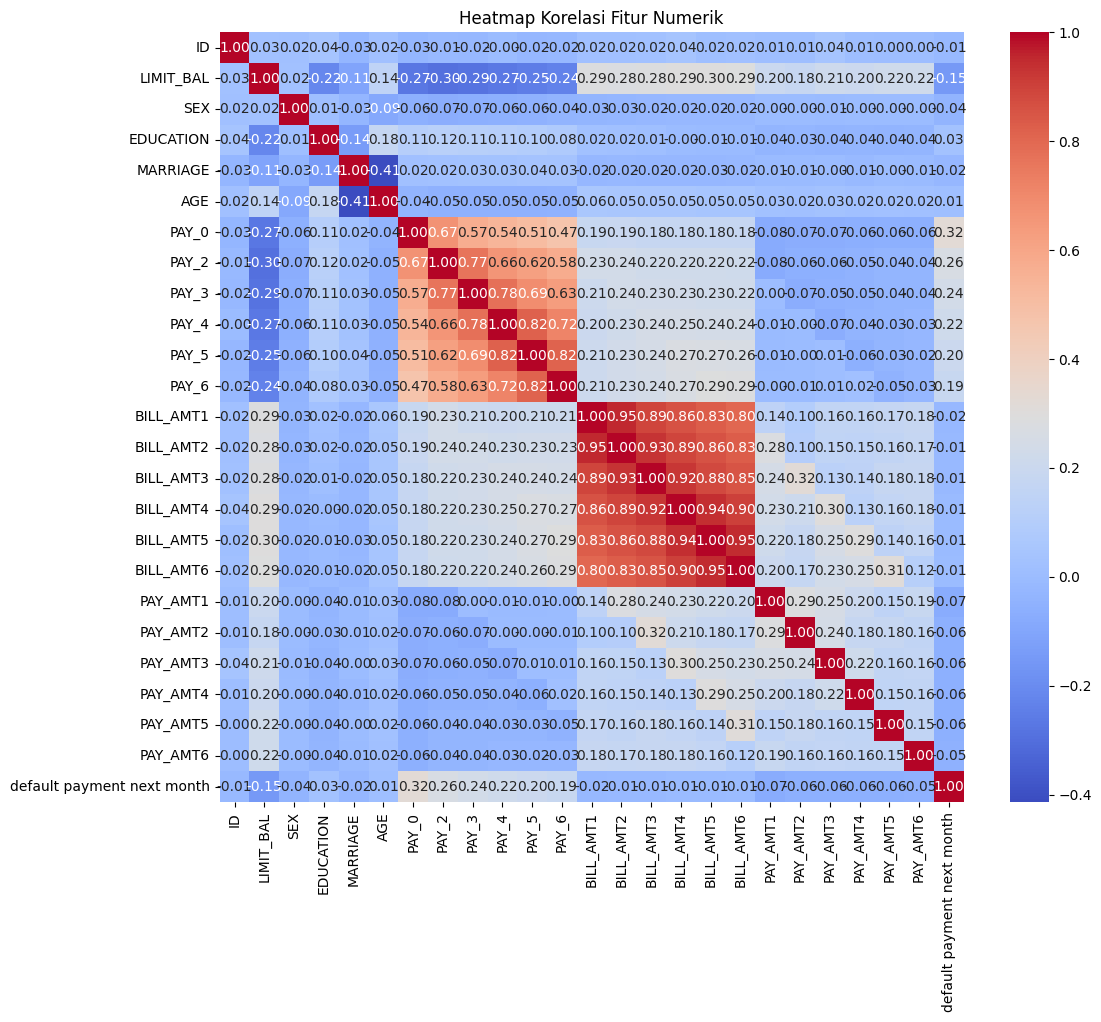

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Boxplot untuk Deteksi Outliers

<Figure size 1500x1000 with 0 Axes>

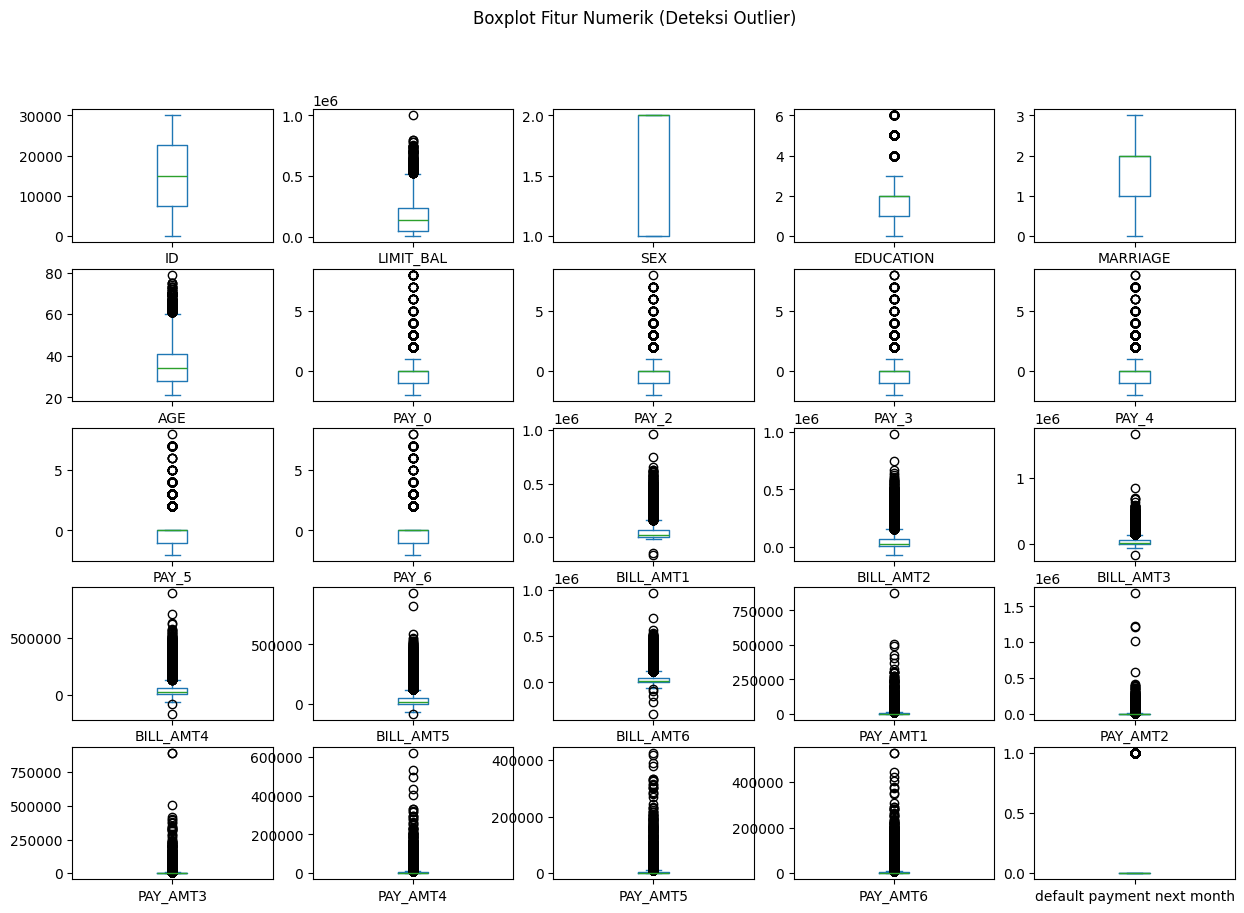

In [12]:
plt.figure(figsize=(15,10))
df[num_cols].plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10), sharex=False, sharey=False)
plt.suptitle("Boxplot Fitur Numerik (Deteksi Outlier)")
plt.show()

## Analisis Fitur vs Target (Numerik)

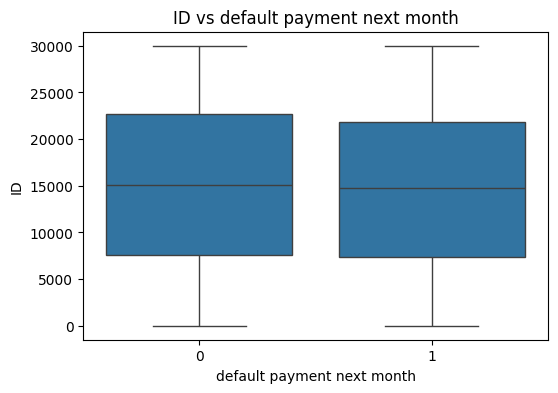

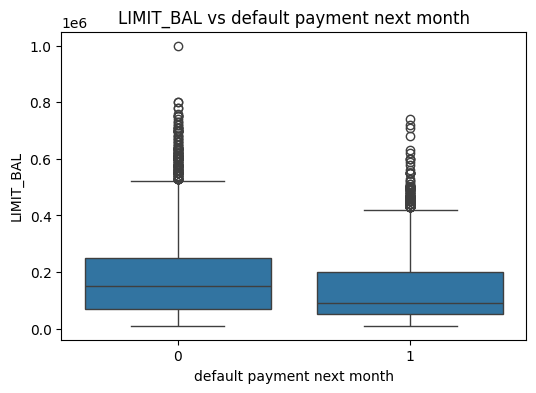

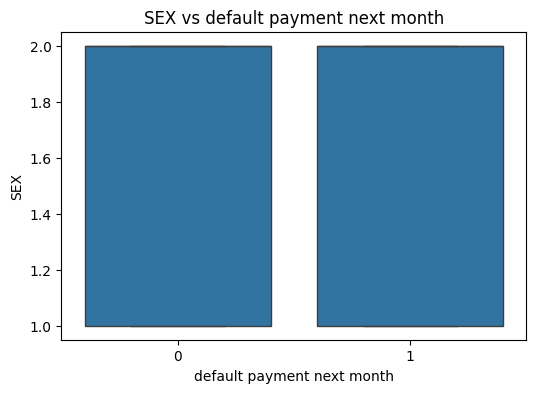

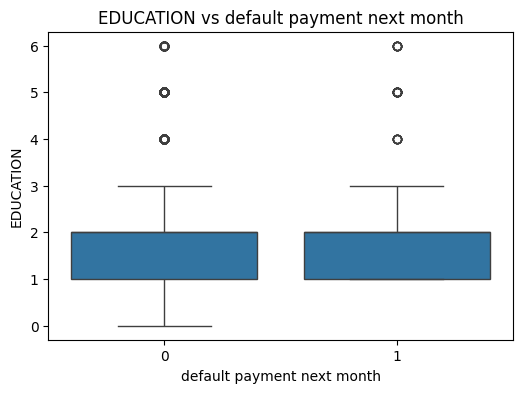

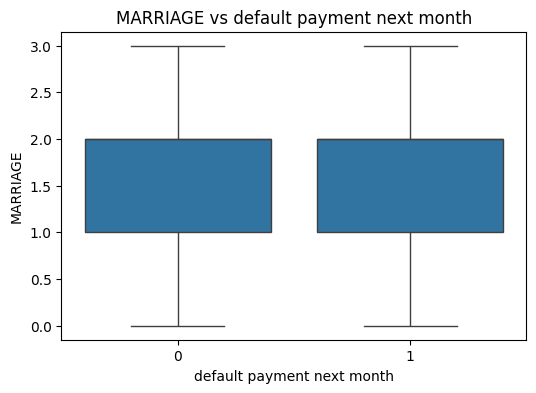

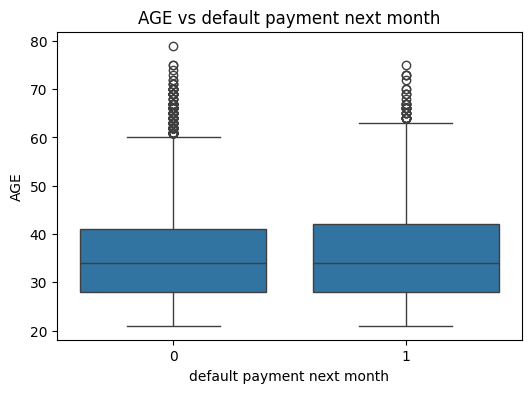

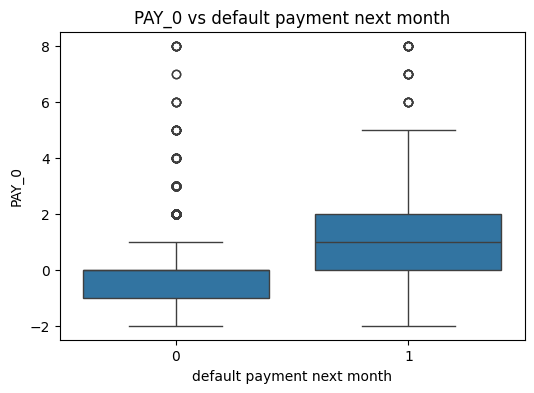

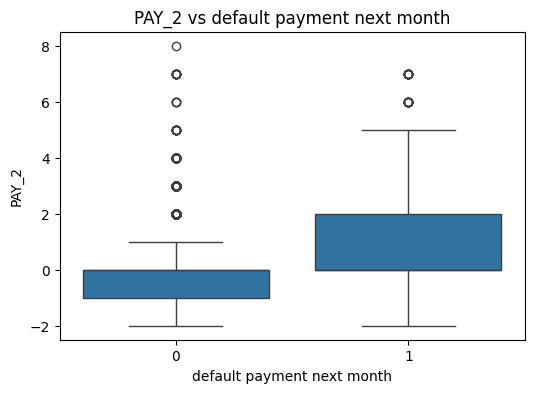

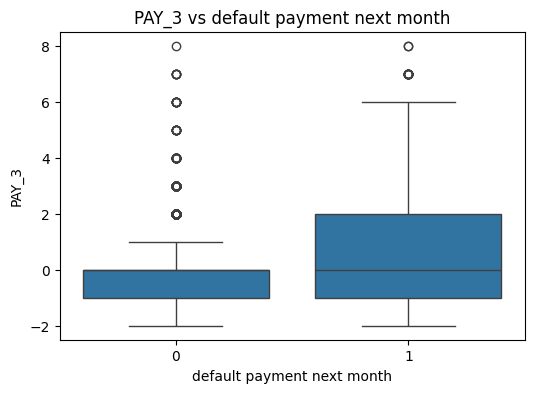

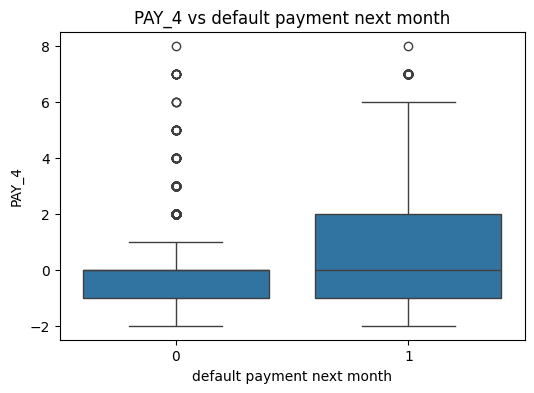

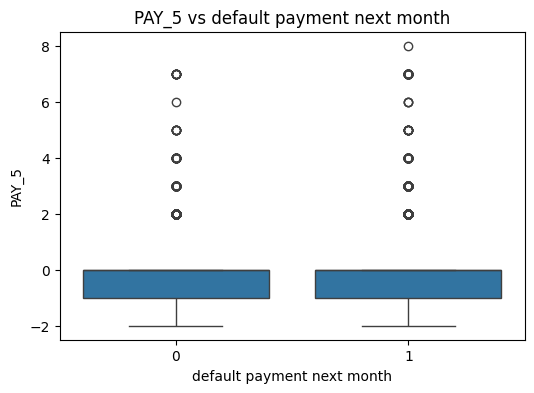

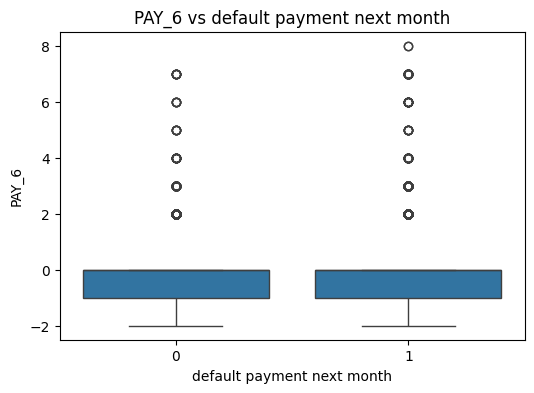

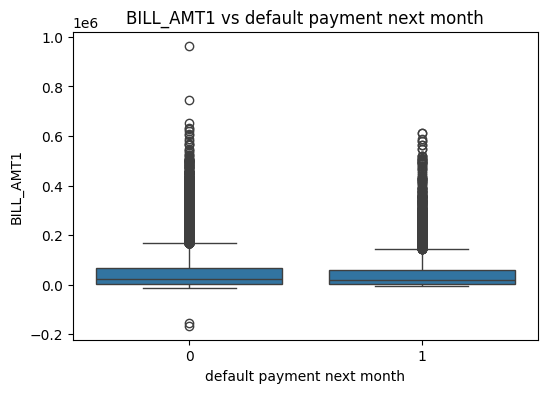

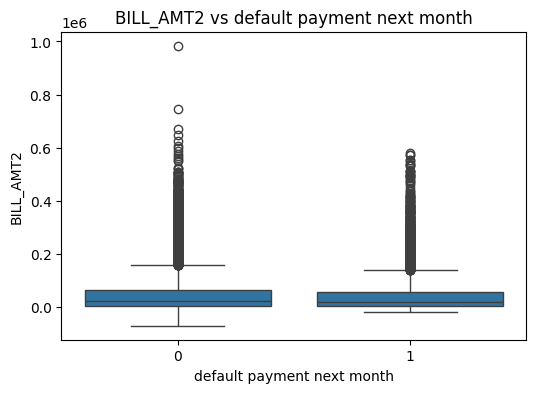

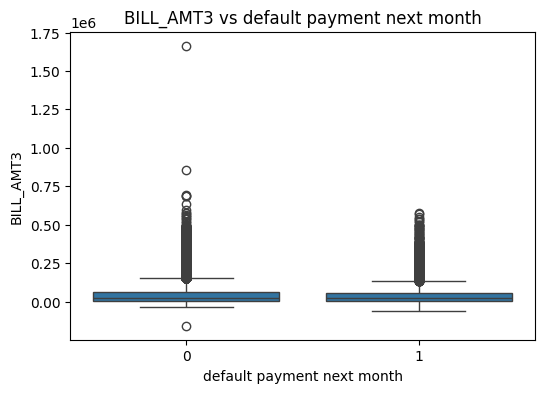

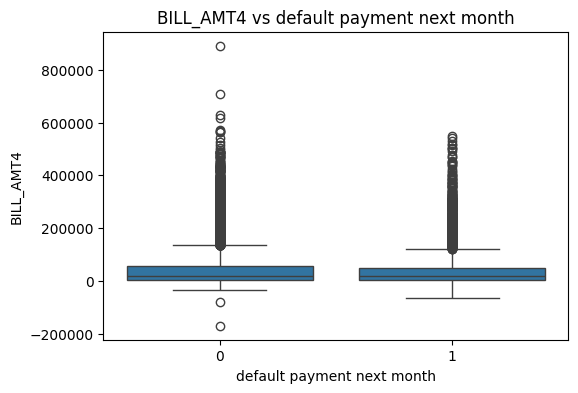

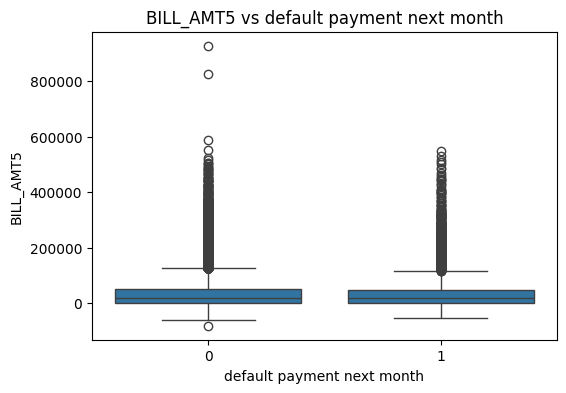

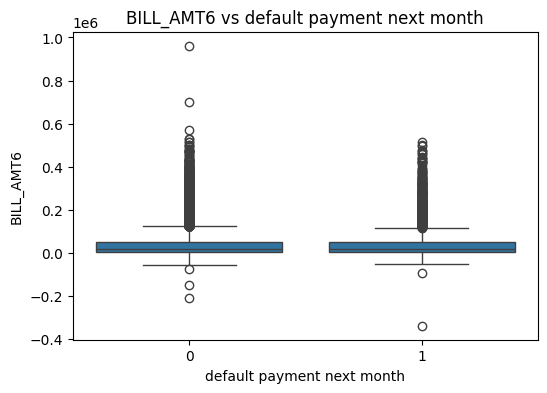

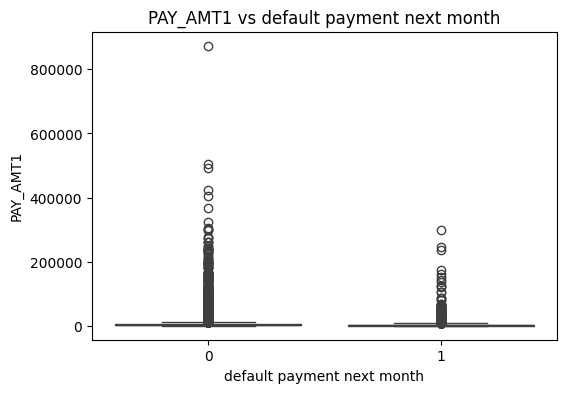

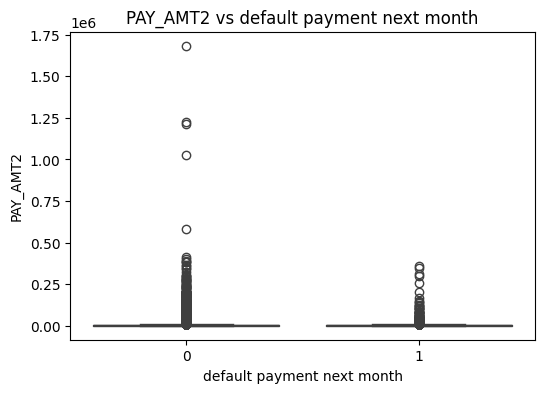

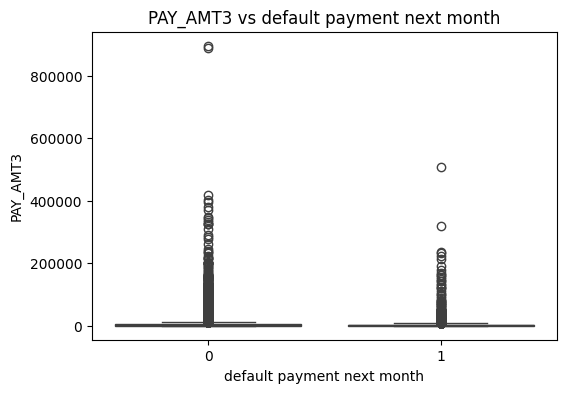

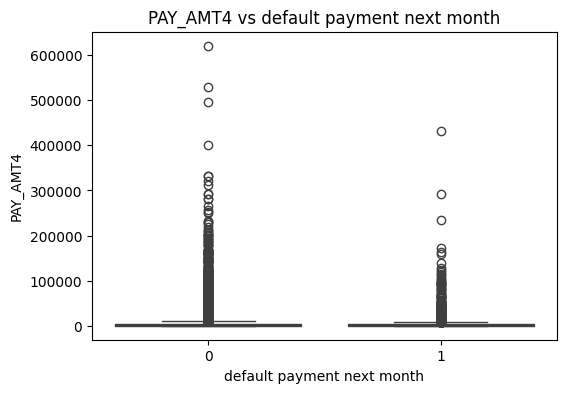

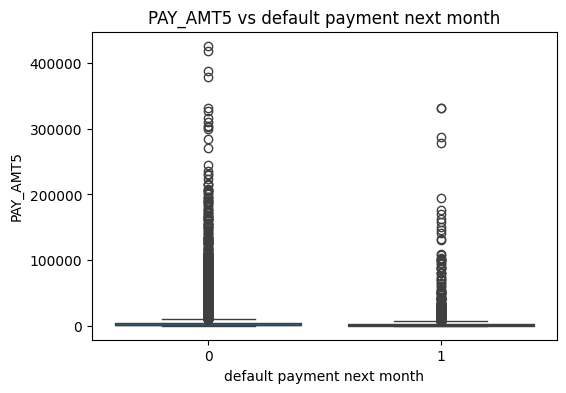

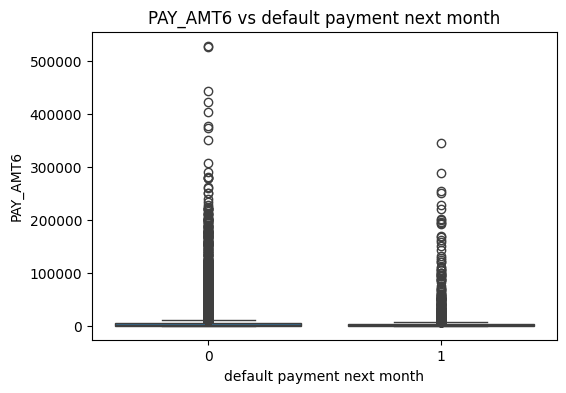

In [13]:
for col in num_cols:
    if col != label_col:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=label_col, y=col, data=df)
        plt.title(f'{col} vs {label_col}')
        plt.show()

## Analisis Fitur Kategorikal vs Target

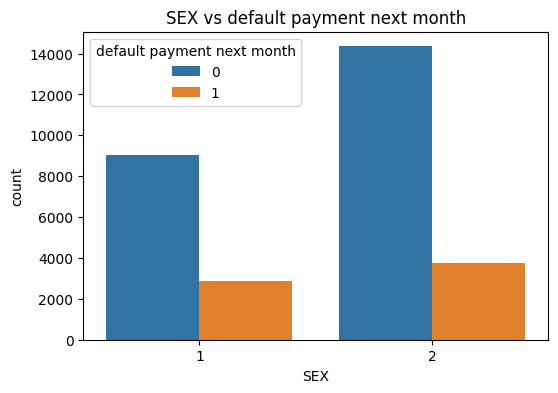

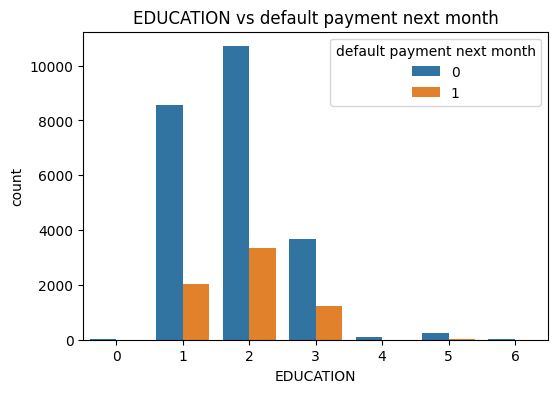

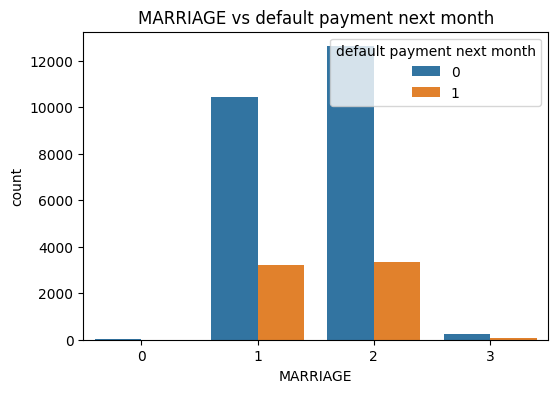

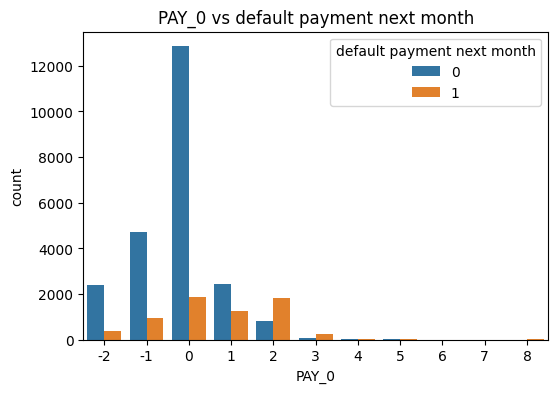

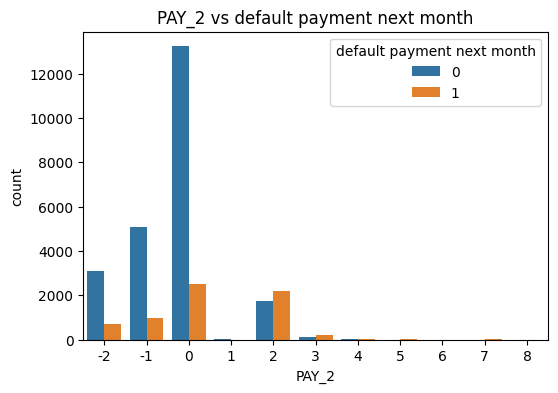

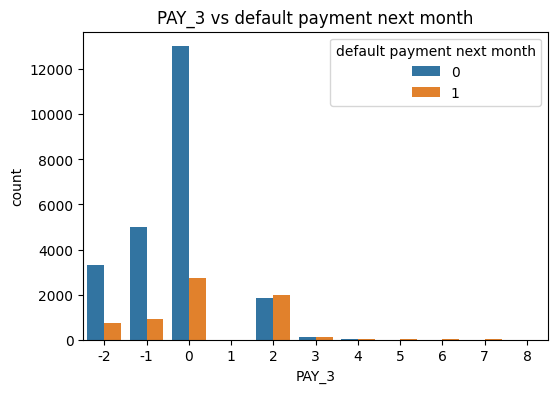

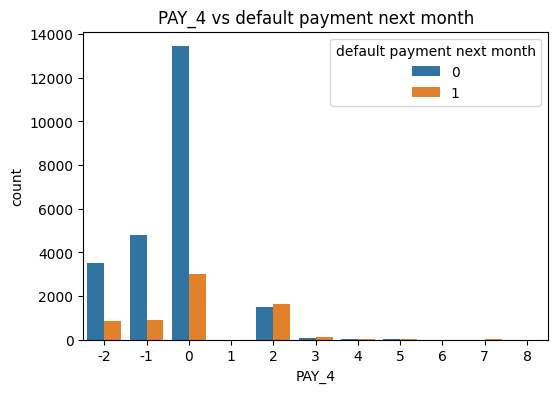

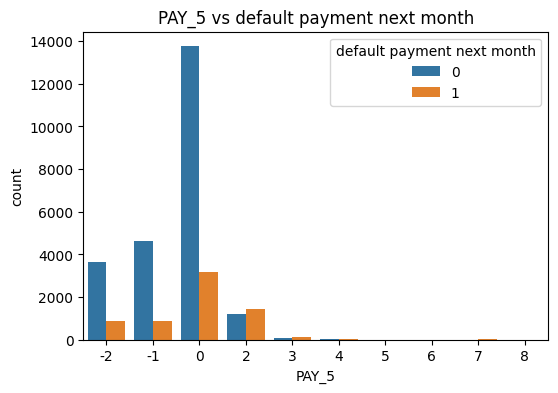

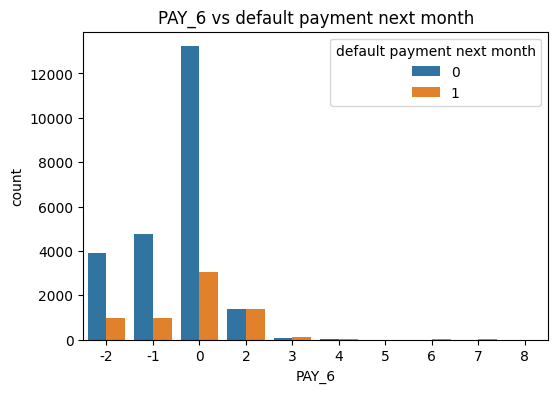

In [14]:
cat_cols = [c for c in df.columns if df[c].nunique() < 20 and c != label_col]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=label_col, data=df)
    plt.title(f'{col} vs {label_col}')
    plt.show()

# HANDLING OUTLIERS

In [15]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

outlier_cols = ["LIMIT_BAL"] + [f"PAY_AMT{i}" for i in range(1, 7)]
df = cap_outliers(df, outlier_cols)

# FEATURE ENGINEERING

In [16]:
# Normalization of bill usage
df["credit_utilization"] = df["BILL_AMT1"] / (df["LIMIT_BAL"] + 1)

# Konsistensi kemampuan bayar (trending)
df["bill_trend"] = df["BILL_AMT1"] - df["BILL_AMT2"]

# Total payment & total bill
df["total_pay_amt"] = df[[f"PAY_AMT{i}" for i in range(1,7)]].sum(axis=1)
df["total_bill_amt"] = df[[f"BILL_AMT{i}" for i in range(1,7)]].sum(axis=1)

# Payment-to-bill ratio
df["payment_ratio"] = df["total_pay_amt"] / (df["total_bill_amt"] + 1)

# One-hot categorical
cat_features = ["SEX", "EDUCATION", "MARRIAGE"]
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# SPLIT DATA

In [17]:
X = df.drop(columns=[label_col])
y = df[label_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SCALING

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# HYPERPARAMETER TUNNING + TRAINING

In [19]:
results = {}
pred_store = {}

## LR (Logistic Regression)

In [20]:
lr_param = {"C": uniform(0.01, 10)}
lr_search = RandomizedSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced'),
                               lr_param, n_iter=10, scoring='recall', cv=3, random_state=42)
lr_search.fit(X_train_scaled, y_train)
lr = lr_search.best_estimator_
pred_lr = lr.predict(X_test_scaled)
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, pred_lr),
    "AUC": roc_auc_score(y_test, pred_lr)
}
pred_store["lr"] = pred_lr

## DT (Decision Tree)

In [21]:
dt_param = {"max_depth": [5,10,20,None], "min_samples_split": randint(2,40)}
dt_search = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                               dt_param, n_iter=12, scoring='recall', cv=3, random_state=42)
dt_search.fit(X_train, y_train)
dt = dt_search.best_estimator_
pred_dt = dt.predict(X_test)
results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, pred_dt),
    "AUC": roc_auc_score(y_test, pred_dt)
}
pred_store["dt"] = pred_dt

## RF (Random Forest)

In [22]:
rf_param = {
    "n_estimators": [200,300,400],
    "max_depth": [10,20,None],
    "class_weight": ["balanced", None],
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                               rf_param, n_iter=8, scoring='recall', cv=3, random_state=42)
rf_search.fit(X_train, y_train)
rf = rf_search.best_estimator_
pred_rf = rf.predict(X_test)
results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, pred_rf),
    "AUC": roc_auc_score(y_test, pred_rf)
}
pred_store["rf"] = pred_rf

## XGB (eXtreme Gradient Boosting)

In [23]:
xgb_param = {
    "n_estimators": [200,300,400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3,5,7],
}
xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', n_jobs=-1),
    xgb_param, n_iter=8, scoring='recall', cv=3, random_state=42
)
xgb_search.fit(X_train, y_train)
xgb = xgb_search.best_estimator_
pred_xgb = xgb.predict(X_test)
results["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, pred_xgb),
    "AUC": roc_auc_score(y_test, pred_xgb)
}
pred_store["xgb"] = pred_xgb

## ANN (Artificial Neural Network)

In [24]:
ann = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=0)
pred_ann = (ann.predict(X_test_scaled) > 0.5).astype(int)
results["ANN"] = {
    "Accuracy": accuracy_score(y_test, pred_ann),
    "AUC": roc_auc_score(y_test, pred_ann)
}
pred_store["ann"] = pred_ann

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# OUTPUT HASIL

In [25]:
print("\n===== HASIL SKENARIO 1 =====\n")
for model, metrics in results.items():
    print(f"{model} →  Accuracy: {metrics['Accuracy']:.4f} | AUC: {metrics['AUC']:.4f}")

print("\n===== CLASSIFICATION REPORT TERBAIK =====")
best_model = max(results, key=lambda x: results[x]["AUC"])
print(f"Model Terbaik: {best_model}")

model_predictions = {
    "Logistic Regression": pred_lr,
    "Decision Tree": pred_dt,
    "Random Forest": pred_rf,
    "XGBoost": pred_xgb,
    "ANN": pred_ann
}

pred_best = model_predictions[best_model]

print("\nClassification Report:")
print(classification_report(y_test, pred_best))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_best))


===== HASIL SKENARIO 1 =====

Logistic Regression →  Accuracy: 0.6700 | AUC: 0.6616
Decision Tree →  Accuracy: 0.7363 | AUC: 0.6861
Random Forest →  Accuracy: 0.7913 | AUC: 0.7090
XGBoost →  Accuracy: 0.8173 | AUC: 0.6572
ANN →  Accuracy: 0.8138 | AUC: 0.6493

===== CLASSIFICATION REPORT TERBAIK =====
Model Terbaik: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.53      0.56      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000


Confusion Matrix:
[[4003  670]
 [ 582  745]]
